# Twitter Entity Sentiment Analysis

## Project Overview
This notebook demonstrates a sentiment analysis project on Twitter data, focusing on classifying the sentiment of tweets related to various entities. The project involves data loading, cleaning, preprocessing, feature extraction, model training, and evaluation.

# Import Libraries

Importing all required Libraries which is the necessary Python libraries for the project, including `pandas` for data manipulation, `numpy` for numerical operations, and `matplotlib.pyplot` and `seaborn` for data visualization.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset using kaggl
Now downloads the Twitter Entity Sentiment Analysis dataset from Kaggle using the `kagglehub` library. The dataset is downloaded to a specified path, and the path to the downloaded files is printed in the next cell.

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("jp797498e/twitter-entity-sentiment-analysis")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/twitter-entity-sentiment-analysis


# Import Data

This lists all the files in the downloaded dataset directory and reads the `twitter_training.csv` file into a pandas DataFrame named `twitter_df`. The path to the CSV file is constructed using the downloaded directory path and the filename.

In [ ]:
import os

# List files in the downloaded directory to find the CSV file
file_list = os.listdir(path)
print("Files in the downloaded directory:", file_list)

# Assuming that the training CSV file is named 'twitter_training.csv' based on the file list
csv_file_name = 'twitter_training.csv'
csv_file_path = os.path.join(path, csv_file_name)
print(f"Attempting to read: {csv_file_path}")

twitter_df = pd.read_csv(csv_file_path)

Files in the downloaded directory: ['twitter_validation.csv', 'twitter_training.csv']
Attempting to read: /kaggle/input/twitter-entity-sentiment-analysis/twitter_training.csv


# Data Exploration (Exploratory Data Analysis)

In this we explores the loaded dataset to understand its structure and content.

*   **Preview the data**: The `head()` method is used to display the first few rows of the DataFrame, providing a quick look at the data format and columns.


In [ ]:
# Preview the data
twitter_df.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [ ]:
twitter_df.tail()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...
74680,9200,Nvidia,Positive,Just like the windows partition of my Mac is l...


In [ ]:
# Example: Count the number of 'Positive' tweets in the training data
positive_tweets_count = sum(twitter_df['Positive'] == 'Positive')
print(f"Number of positive tweets in the training data: {positive_tweets_count}")

Number of positive tweets in the training data: 20831


###   **Count occurrences of each sentiment label**:
The `value_counts()` method is used to count the number of tweets for each sentiment label in the 'Positive' column, providing insights into the distribution of sentiments in the dataset.

In [ ]:
# Count occurrences of each sentiment label
sentiment_counts = twitter_df['Positive'].value_counts()
print(sentiment_counts)

Positive
Negative      22542
Positive      20831
Neutral       18318
Irrelevant    12990
Name: count, dtype: int64


### Check for Missing Values

This section checks for missing values in the DataFrame using the `isnull().sum()` method. This helps identify columns with missing data that may need to be handled during data cleaning.

In [ ]:
# check if there are any missing values
twitter_df.isnull().sum()
# train.isnull().values.any()

,0
2401,0
Borderlands,0
Positive,0
"im getting on borderlands and i will murder you all ,",686


#Data Cleaning

In thid we defines and applies a function to clean the tweet text data.

*   **Download stopwords**: It downloads the NLTK stopwords corpus if not already present.
*   **Define cleaning function**: The `clean_text` function performs several cleaning steps, including converting text to lowercase, removing URLs, punctuation, numbers, emojis, and stopwords, and removing extra spaces.
*   **Apply cleaning function**: The `clean_text` function is applied to the tweet column of the DataFrame, and the cleaned text is stored in a new column named `clean_tweet`.


In [ ]:
import nltk
import re
from nltk.corpus import stopwords

# Download stopwords
try:
    stopwords = set(stopwords.words('english'))
except LookupError:
    nltk.download('stopwords')
    stopwords = set(stopwords.words('english'))


# Define cleaning functions in the data
def clean_text(text):
    if isinstance(text, str): # Ensure the input is a string
        text = text.lower()                                      # Lowercase text
        text = re.sub(r'http\S+', '', text)                      # Remove URLs
        text = re.sub(r'[^a-zA-Z0-9\s]', '', text)               # Remove punctuation, numbers and emojis
        text = ' '.join([word for word in text.split() if word not in stopwords]) # Remove stopwords
        text = re.sub(r'\s+', ' ', text).strip()                 # Remove extra spaces
        text = re.sub(r"#", "", text)                            # Remove hashtags
        text = re.sub(r"@\w+", "", text)                         # Remove mentions
        text = re.sub(r"\d+", "", text)                          # Remove digits
        text = re.sub(r"\s+", " ", text).strip()                 # Remove extra spaces

        return text
    else:
        return "" # Return empty string for non-string inputs


# Example usage:
sample_text = "Check out this link: https://example.com It's great! 123 #awesome"
cleaned_sample_text = clean_text(sample_text)
print(f"Original text: {sample_text}")
print(f"Cleaned text: {cleaned_sample_text}")

Original text: Check out this link: https://example.com It's great! 123 #awesome
Cleaned text: check link great awesome


###   **Compare cleaned and uncleaned tweets**:
 The `head()` method is used to display the first few rows of the DataFrame, allowing a comparison between the original and cleaned tweet text.

In [ ]:
# Get the name of the last column (tweet text)
tweet_column_name = twitter_df.columns[-1]

# Apply the clean_text function to the tweet column and create a new column
twitter_df["clean_tweet"] = twitter_df[tweet_column_name].apply(clean_text)

# compare the cleaned and uncleaned tweets
twitter_df.head(10)

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,",clean_tweet
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,coming borders kill
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,im getting borderlands kill
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,im coming borderlands murder
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,im getting borderlands murder
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...,im getting borderlands murder
5,2402,Borderlands,Positive,So I spent a few hours making something for fu...,spent hours making something fun dont know hug...
6,2402,Borderlands,Positive,So I spent a couple of hours doing something f...,spent couple hours something fun dont know im ...
7,2402,Borderlands,Positive,So I spent a few hours doing something for fun...,spent hours something fun dont know im huge bo...
8,2402,Borderlands,Positive,So I spent a few hours making something for fu...,spent hours making something fun dont know hug...
9,2402,Borderlands,Positive,2010 So I spent a few hours making something f...,spent hours making something fun dont know hug...


In [ ]:
# Get the name of the last column (tweet text) in the test data
test_tweet_column_name = twitter_df.columns[-1]

# Apply the clean_text function to the tweet column and create a new column
twitter_df["clean_tweet"] = twitter_df[test_tweet_column_name].apply(clean_text)

# compare the cleaned and uncleaned tweets
twitter_df.tail()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,",clean_tweet
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...,realized windows partition mac like years behi...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...,realized mac window partition years behind nvi...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...,realized windows partition mac years behind nv...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...,realized windows partition mac like years behi...
74680,9200,Nvidia,Positive,Just like the windows partition of my Mac is l...,like windows partition mac like years behind d...


# Train Test Split

Now we can splits the cleaned data into training and testing sets for model training and evaluation.

*   **Extract labels**: The sentiment labels from the 'Positive' column are extracted into the `y` variable.
*   **Split data**: The `train_test_split` function from `sklearn.model_selection` is used to split the cleaned tweet text (`x`) and labels (`y`) into training and testing sets. The data is split with a test size of 20%, and stratification is used to ensure that the sentiment distribution is similar in both the training and testing sets. `random_state` is set for reproducibility, and `shuffle` is set to True to shuffle the data before splitting.

In [ ]:
from sklearn.model_selection import train_test_split

# extract the labels from the train data
y = twitter_df['Positive'].values

# use 80% for the training and 20% for the test
x_train, x_test, y_train, y_test = train_test_split(twitter_df['clean_tweet'].values, y,
                                                    stratify=y,
                                                    random_state=1,
                                                    test_size=0.2, shuffle=True)

# Feature Extraction Using TF-IDF

This section converts the cleaned text data into numerical features using the TF-IDF (Term Frequency-Inverse Document Frequency) method.

*   **Initialize TF-IDF Vectorizer**: A `TfidfVectorizer` is initialized with parameters to control the maximum and minimum document frequency of terms and the maximum number of features. Stop words are also removed during vectorization.
*   **Convert data to TF-IDF features**: The `fit_transform` method is used to fit the vectorizer to the training data and transform it into TF-IDF features. The `transform` method is used to transform the test data using the same fitted vectorizer.
*   **Check the result**: The resulting TF-IDF features for the training set are converted to a dense array and displayed as a pandas DataFrame with the corresponding feature names as columns.

In [ ]:
# initalize TF-IDF Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')

# Convert cleaned data into TF-IDF features
tfidf_train_features = tfidf_vectorizer.fit_transform(x_train)
tfidf_test_features = tfidf_vectorizer.transform(x_test)

# check the result
pd.DataFrame(tfidf_train_features.toarray(), columns = tfidf_vectorizer.get_feature_names_out())

,able,absolute,absolutely,ac,access,account,accounts,achievement,action,activision,...,years,yes,yesterday,yo,youll,youre,youtu,youtube,youtubecom,zero
0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59739,0.0,0.0,0.0,0.393918,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59740,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59741,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59742,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Model Building

This section builds a Logistic Regression model for sentiment classification.

*   **Initialize Logistic Regression model**: A `LogisticRegression` model is initialized with a specified maximum number of iterations.
*   **Train the model**: The model is trained on the TF-IDF features of the training data using the `fit()` method.
*   **Perform prediction**: The trained model is used to predict the sentiment labels for both the training and testing sets using the `predict()` method.

In [ ]:
from sklearn.linear_model import LogisticRegression
# classify using Logistic Regression
lregr = LogisticRegression(max_iter=  300)

# fit the LogisticRegression model based on the given training data
lregr = lregr.fit(tfidf_train_features, y_train)
lregr.predict_proba(tfidf_train_features)

# perform classification and prediction on samples in x_test and train
y_pred_lregr_train = lregr.predict(tfidf_train_features)
y_pred_lregr_test = lregr.predict(tfidf_test_features)

# Model Evaluation

This help to evaluates the performance of the trained Logistic Regression model.

*   **Print classification report**: The `classification_report` function from `sklearn.metrics` is used to print classification metrics such as precision, recall, F1-score, and support for each sentiment class.
*   **Plot confusion matrix**: A confusion matrix is generated using the `confusion_matrix` function and visualized as a heatmap using `seaborn`. The confusion matrix shows the number of true positive, true negative, false positive, and false negative predictions for each class.

              precision    recall  f1-score   support

  Irrelevant       0.56      0.38      0.46     10392
    Negative       0.66      0.70      0.68     18033
     Neutral       0.51      0.57      0.54     14654
    Positive       0.61      0.64      0.63     16665

    accuracy                           0.59     59744
   macro avg       0.59      0.57      0.57     59744
weighted avg       0.59      0.59      0.59     59744



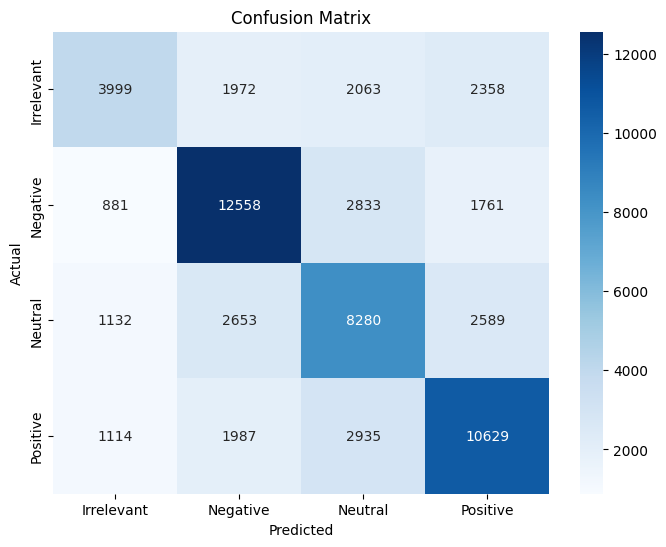

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# print classification metrics
print(classification_report(y_train, y_pred_lregr_train))

# plot confusion metrics
cm = confusion_matrix(y_train, y_pred_lregr_train)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=lregr.classes_,
            yticklabels=lregr.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Accuracy score for LogisticRegression

This section calculates and prints the accuracy score of the Logistic Regression model on the test set using the `accuracy_score` function from `sklearn.metrics`. The accuracy score represents the proportion of correctly predicted sentiment labels in the test set.

In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy score for LogisticRegression is: ", accuracy_score(y_test, y_pred_lregr_test) * 100, '%')

Accuracy score for LogisticRegression is:  57.079734886523404 %


# Conclusion :

## Based on the steps performed in this notebook:

* Data Loading and Cleaning: The Twitter sentiment dataset was successfully loaded, and the tweet text was cleaned by removing URLs, punctuation, numbers, and stopwords, and converting text to lowercase.
* Train-Test Split and Feature Extraction: The data was split into training and testing sets, and the text data was converted into numerical features using TF-IDF.
* Model Training and Evaluation: A Logistic Regression model was trained on the TF-IDF features of the training data and evaluated on the test data. The accuracy score on the test set is 57.24%

This cell applies the `clean_text` function to the test dataset, creating a new column `clean_tweet` with the cleaned text. The `tail()` method is used to display the last few rows of the test DataFrame, showing the effect of the cleaning process.